# CNN for Fashion MNIST Clothing Classification

##### **Convolutional Neural Network:** CNN is a class of deep neural networks, most commonly used for analyzing images.
##### **Fashion MNIST Dataset:** Fashion MNIST is a dataset consisting of images with training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

### Importing Libraries

In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(60000, 28, 28)

### Preprocessing

In [4]:
train_data = train_data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)

In [5]:
train_data = train_data.astype('float32')/255    # Value of each pixel will range from 0 to 1 for improving learning rate of model
test_data = test_data.astype('float32')/255

In [6]:
# Using One Hot Encoding because we cannot work with categorical data directly
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels) 

### Training the model

In [7]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(28,28,1)))    # Training using 128 neurons and a 3x3 feature detector
model.add(Activation('relu'))                         # Using ReLU activation function
model.add(MaxPooling2D(pool_size=(2,2)))              # Using Max Pooling to calculate the maximum value for each patch of the feature map
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())                                  # To input 2D data and output data in 1D
model.add(Dense(128))                                 # Adding dense layers
model.add(Dense(10))
model.add(Activation('softmax'))   # Using softmax activation function for the last layer so that the result could be interpreted as a probability distribution
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [8]:
model.fit(train_data,train_labels_encoded,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 37s 10ms/step - loss: 0.6604 - accuracy: 0.7607
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3074 - accuracy: 0.8887
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2615 - accuracy: 0.9065
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2259 - accuracy: 0.9182
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2150 - accuracy: 0.9205
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1935 - accuracy: 0.9306
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1732 - accuracy: 0.9366
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1611 - accuracy: 0.9412
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1417 - accuracy: 0.9501
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1286 - accuracy: 0.95

In [9]:
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.9053
Test loss: 0.27368462085723877
Test accuracy: 0.9053000211715698


### Predicting Results

In [10]:
predictions = model.predict(test_data)

In [11]:
# Printing the very first prediction
print(np.argmax(np.round(predictions[0])))

9


In [12]:
print(test_labels[0])   # This verifies that the prediction is correct

9


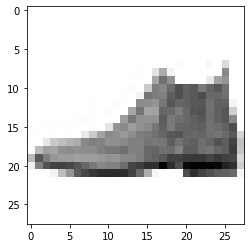

In [13]:
# Displaying the first image
plt.imshow(test_data[0].reshape(28,28),cmap = plt.cm.binary)
plt.show()

### Getting the pkl File

In [22]:
import pickle
weigh= model.get_weights();    pklfile= "FashionMNISTClassifier.pkl"
fpkl= open(pklfile, 'wb')     
pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
fpkl.close()